# Savoir si les députés sont spécialisés sur des sujets ou non
Afin de savoir comment le graphe des députés peut il prendre forme

In [1]:
#import
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from collections import Counter
from random import sample, randint

In [2]:
# Import data
data_path = "../data/"
df = pd.read_pickle(data_path+"df_2017_avec_auteurs.pkl")

# 1. Prendre un député par un et observer la rubrique et le titre des lettres qu'il envoient

In [71]:
# Fonction observant certaines informations sur l'ensemble lettres d'un député
# À mettre dans le apply du groupby
def list_from_titres(x):
    # Renvoyer : 
        # Nom et groupe du député
        # Le nombre de lettres envoyées
        # Chaque rubrique et titre des lettres
    return \
        x['nom_auteur'].max(), x['groupe_auteur'].max(),\
        len(x['titre']), \
        [(i.upper(),j) for (i,j) in zip(x['rubrique'],x['titre'])] 

# On regroupe par ref_auteur et on affiche les informations
df[['ref_auteur','titre','rubrique','nom_auteur','groupe_auteur']].groupby('ref_auteur').apply(list_from_titres)[randint(1,len(df.ref_auteur.unique()))]

('dino cinieri',
 'LR',
 131,
 [('SANG ET ORGANES HUMAINS', 'plasma . norme sécurité . conséquence .'),
  ('AGRICULTURE',
   'versement indemnité compensatoire handicap naturel ( ichn )'),
  ('RETRAITES : RÉGIME AGRICOLE',
   'proposition calcul retraite agricole 25 meilleur année'),
  ('RÉGIME SOCIAL DES INDÉPENDANTS', 'conséquence suppression rsi'),
  ('SANTÉ', 'financement pilotage troisième plan national maladie rare'),
  ('HANDICAPÉS', 'quatrième plan autisme , auxilliaire vie scolaire .'),
  ('SANTÉ', 'tabac , 10 euro , buraliste , lutte marché parallèle'),
  ('PHARMACIE ET MÉDICAMENTS',
   'lévothyrox , nouveau formule , effet secondaire'),
  ('IMPÔTS ET TAXES', 'conséquence hausse csg , diminution pension retraite'),
  ('IMPÔTS ET TAXES', 'impôt forfaitaire 30 pourcent pel'),
  ('SANTÉ', 'pollution eau , perturbateur endocrinien , pilule contraceptif'),
  ('AGRICULTURE', 'destruction parcelle faucheur volontaire'),
  ('AGRICULTURE', 'conséquence interdiction glyphosate agricult

### 1. Résultats observer titres
* Députés semblent spécialisés sur un **sujet** précis (mais pas forcément rubrique)

On observe que les députés semblent bien avoir des sujets de prédilection précis, même s'ils peuvent être variés. En effet, plusieurs répétitions de la même rubrique et de titres sur des sujets similaires indiquent qu'ils s'investissent particulièrement sur certains sujets.

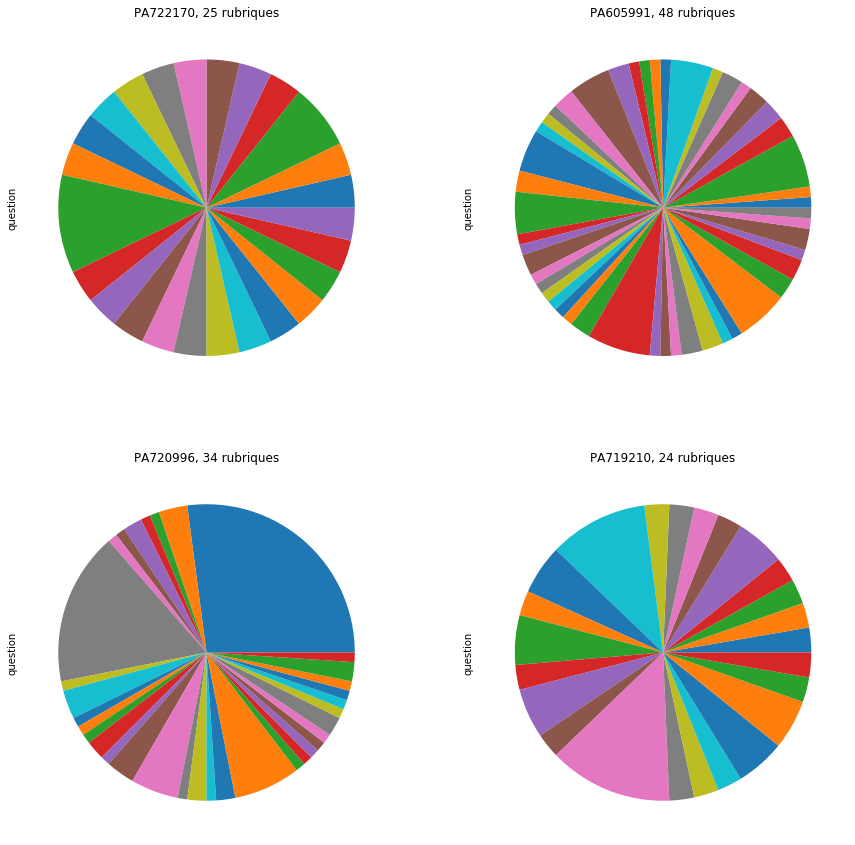

In [72]:
# for i,r in df.groupby(['ref_auteur','rubrique']).count()['question'][:10].iterrows():
#     print(r)
dfqr = df.groupby(['ref_auteur','rubrique']).count()['question']
nr = 2
nl = 2
fig, axes = plt.subplots(nr,nl,figsize = (15,15))
i= 0

auteurs_alea = sample(list(df.ref_auteur.unique()),nl*nr)
for auteur in auteurs_alea:
    dfqr[auteur].plot.pie(ax=axes[i//nr,i%nl],labels = None,title = "{}, {} rubriques".format(auteur,len(dfqr[auteur])))
    i = i +1

### 1. Résultats observer rubriques camemberts
* Très mitigé car une bonne répartition

# 2. Prendre des indicateurs voire faire des tests statistiques pour chiffrer cette spécialisation
## 2.1 Indicateur de répartition
Il y a en tout **Nr** = 211 rubriques [1]. On peut regarde à quel point les députés se concentrent sur certaines d'entre elles. 

In [187]:
# Valeurs utilisées dans le paragraphe précédent
# [1]
nb_rubriques = len(df['rubrique'].unique())
print("[1] Il y a au total {} rubriques".format(nb_rubriques))
# [2]
max_nbl_depute = df.groupby('ref_auteur').count().uid.max()
print("[2] Le nombre maximal de lettres envoyées par un député est {}".format(max_nbl_depute))

[1] Il y a au total 211 rubriques
[2] Le nombre maximal de lettres envoyées par un député est 176


### 2.1.A Nombre de lettres par rubrique par député
On évalue la quantité de lettres moyenne écrité par un député dans une rubrique.

In [4]:
# Score décrit en 2.2.A
# On regroupe par auteur et rubrique en comtant les lettres et on moyenne le tout
mean_score21a = df.groupby(['ref_auteur','rubrique'])['uid'].count().mean()

print("Le score décrit en 2.1.A a une valeur de {}".format(mean_score21a))

Le score décrit en 2.1.A a une valeur de 1.732453544798201


#### 2.1.A Résultats
On écrit en moyenne 1.73 lettres dans une rubrique lorsqu'on est député, ce qui est finalement assez faible. Mais ce score ne donne pas totalement d'information sur la répartition et la concentration, ce qui est plus le cas de suivant.

### 2.1.B Écart quadratique
Le score pour un député est : somme sur chaque rubrique des carrés du *nombre de lettres* divisé le *nombre de lettres total*. On peut aussi diviser cette valeur si tout était également réparti, donc 1 dans le cas ou on envoie moins de 211 lettres, c-à-d tout le temps. (Le max est **176** [2])

In [6]:
# Score décrit en 2.2.B
# Fonction de calcul du score, somme des carrés divisé par la taille
def score_2_1_b(x):
    return sum([i*i for i in x])/(len(x))

# On regroupe par auteur et rubrique en comptant les lettres puis retire les index 
# Pour refaire un groupby sur les auteurs et appliquer la fonciton de score 
mean_score21b = df.groupby(['ref_auteur','rubrique'])[['uid']].count().reset_index().groupby('ref_auteur').uid.apply(score_2_1_b).mean()

print("Le score décrit en 2.1.B a une valeur de {}".format(mean_score21b))

Le score décrit en 2.1.B a une valeur de 6.810170673387791


### 2.1.B Réslutats 
Le score 2.1.b nous donne un résultat moyen assez élevé, de plus 6, indiquant que les députés se spécialisent bien dans des rubriques

## 2.1 Améliorations à effectuer
Vérifier la répartition avec un test statistique

## 2.1 Autres
Voir Wikipedia :
* Coef de Gini
* Indicateur de dispersion
* Coef de variation

### 2.2 Comparaison entre députés
Pour s'assurer que les député se spécialisent bien dans des sujets différents entre eux, il faudrait plutôt comparer les distances de répartitoins entre députés et voir si on a effectivement des différences

## Corriger
* Corriger les noms des députés
## Questions
### Calcul score
* Améliorer score de 2.1
* Ou bien se documenter sur une meilleure mesure de la répartition
* On peut aussi prendre la variable centrée réduite des 2.1
### Application score
* Ont-ils des sujets de prédilection ou bien simplement desconcentration temporaires sur une question précise ?
* Mesurer la proximité entre les rubriques pour avoir une meilleure idée de la concentration de 2.1
* Effectuer les 2.1 sur des titres et avec le champ lexical
* Faire avec des topics et non des rubriques